<h1 align='center'>Univariate Impute Categorical</h1>

- Most frequent imputation 
- Missing data

### Most Frequent Impute

#### Assumtion 

- MCAR
- As most frequently imputation means we are using mode of categorical data, so mode category/class should be more occurring than other class

#### Advantage


- Easy to use

#### Disadvantage

- Change Distribution of data

### Missing Category Imputeation

- We create completly new category missing to indicate missing data 

#### Advantage

- Easy to use

#### Disadvantage

- Not as such disadvantage but it just give randomness to data

### Import library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageQual', ylabel='count'>

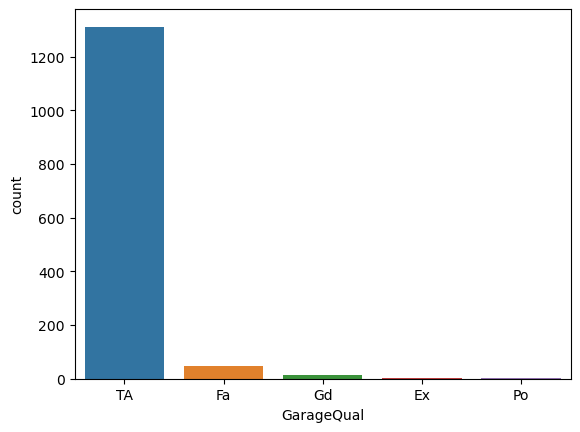

In [6]:
sns.countplot(df['GarageQual'])

In [7]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

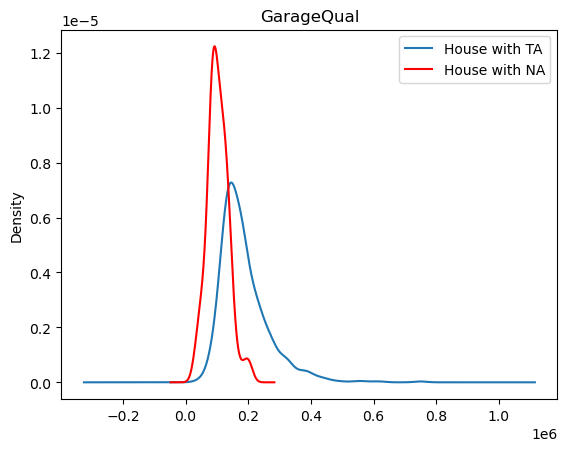

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels=['House with TA','House with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [9]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [10]:
df['GarageQual'].fillna('TA', inplace=True)

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageQual', ylabel='count'>

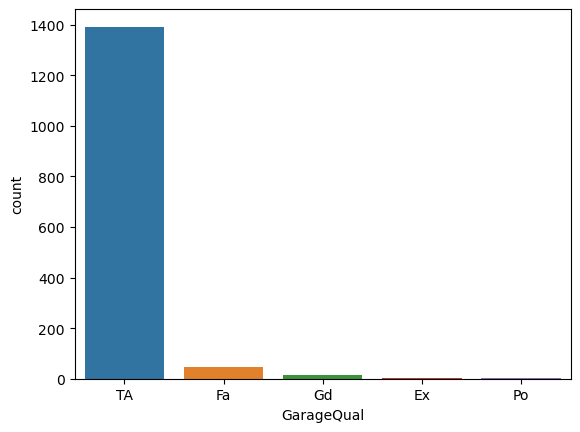

In [11]:
sns.countplot(df['GarageQual'])

Text(0.5, 1.0, 'GarageQual')

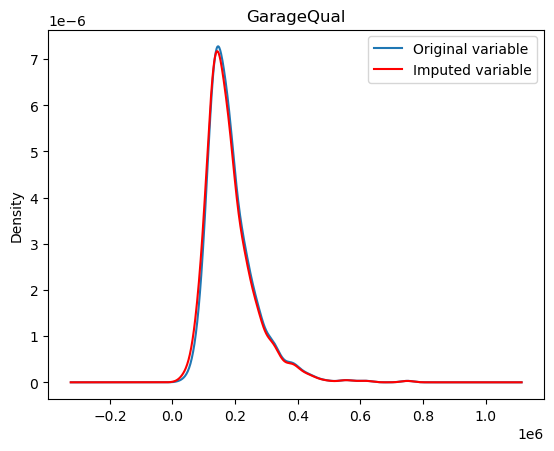

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')


C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

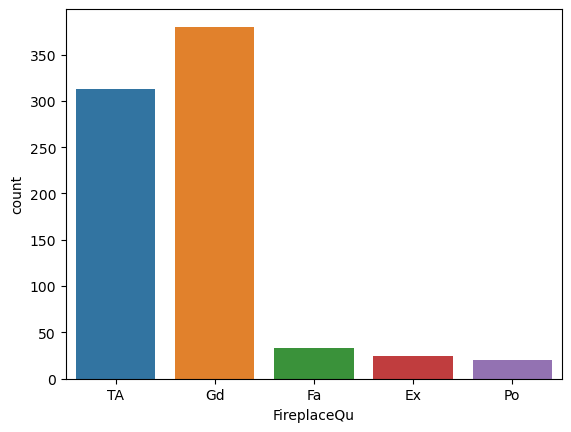

In [14]:
sns.countplot(df['FireplaceQu'])

Text(0.5, 1.0, 'FireplaceQu')

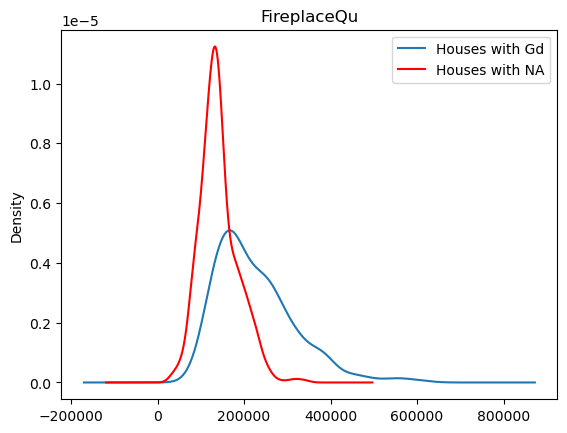

In [15]:
fig = plt.figure()
ax= fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels= ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')

In [16]:
temp =df[df['FireplaceQu']=='Gd']['SalePrice']

In [17]:
df['FireplaceQu'].fillna('Gd',inplace=True)

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

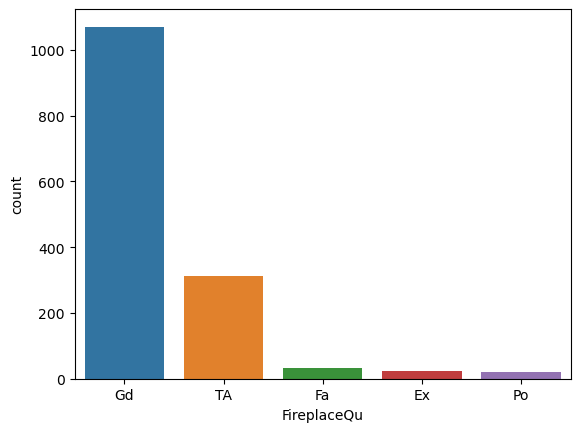

In [18]:
sns.countplot(df['FireplaceQu'])

Text(0.5, 1.0, 'FireplaceQu')

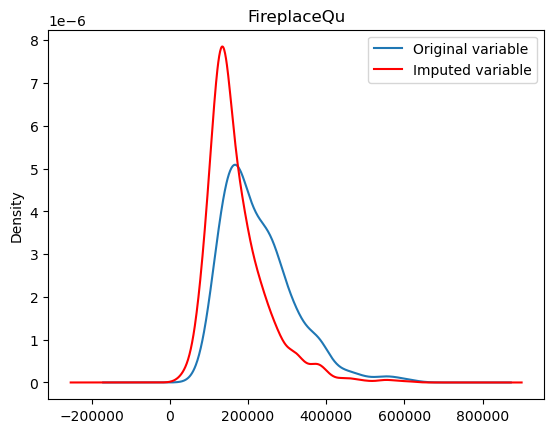

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

### Using Sklearn 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [21]:
X= df.drop(columns='SalePrice')
y= df['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
imputer= SimpleImputer(strategy='most_frequent')

In [24]:
X_train_transform = imputer.fit_transform(X_train)
X_test_transform = imputer.transform(X_test)

In [25]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)